# 1. Import Packages

In [1]:
import pandas as pd
import numpy as np
import pandasql as pdsql

import requests
import copy
import urllib
import hashlib
import urllib.parse
import urllib.request
import pandas as pd
import json
import datetime
import time
import xgboost as xgb
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder

import os
from itertools import product
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score, recall_score,roc_auc_score, confusion_matrix,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import lightgbm as lgb
import matplotlib.pyplot as plt
import pickle
import warnings
import catboost as cb
from catboost import CatBoostRegressor
#warnings.filterwarnings("ignore", category=FutureWarning)

C:\Users\Li Xiang\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# 2. Galance Datasets

In [2]:
df_calendar = pd.read_csv('./Data Analytics Case Competition Datasets/calendar.csv')

In [3]:
df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,225224,2019-02-09,t,$105.00,$105.00,1.0,365.0
1,225224,2019-02-10,t,$105.00,$105.00,1.0,365.0
2,225224,2019-02-11,t,$105.00,$105.00,1.0,365.0
3,225224,2019-02-12,t,$105.00,$105.00,1.0,365.0
4,225224,2019-02-13,t,$105.00,$105.00,1.0,365.0


In [4]:
df_listings_details = pd.read_csv('./Data Analytics Case Competition Datasets/listings_details.csv')

C:\Users\Li Xiang\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df_listings_details.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,2.019030e+13,3/12/19,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",...,f,f,super_strict_30,f,f,1,1,0,0,0.34
1,5506,https://www.airbnb.com/rooms/5506,2.019030e+13,3/12/19,**$79 Special ** Private! Minutes to center!,This is a private guest room with private bath...,**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,This is a private guest room with private bath...,none,"Peacful, Architecturally interesting, historic...",...,t,f,strict_14_with_grace_period,f,f,6,6,0,0,0.67
2,6695,https://www.airbnb.com/rooms/6695,2.019030e+13,3/12/19,$99 Special!! Home Away! Condo,NaN,** WELCOME *** FULL PRIVATE APARTMENT In a His...,** WELCOME *** FULL PRIVATE APARTMENT In a His...,none,"Peaceful, Architecturally interesting, histori...",...,t,f,strict_14_with_grace_period,f,f,6,6,0,0,0.73
3,6976,https://www.airbnb.com/rooms/6976,2.019030e+13,3/12/19,Mexican Folk Art Haven in Boston Residential Area,Come stay with me in Boston's Roslindale neigh...,"This is a well-maintained, two-family house bu...",Come stay with me in Boston's Roslindale neigh...,none,The LOCATION: Roslindale is a safe and diverse...,...,f,f,moderate,t,f,1,0,1,0,0.64
4,8789,https://www.airbnb.com/rooms/8789,2.019030e+13,3/12/19,Curved Glass Studio/1bd facing Park,"Bright, 1 bed with curved glass windows facing...",Fully Furnished studio with enclosed bedroom. ...,"Bright, 1 bed with curved glass windows facing...",none,Beacon Hill is a historic neighborhood filled ...,...,f,f,strict_14_with_grace_period,f,f,10,10,0,0,0.39


In [6]:
df_listings_details.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [7]:
df_listings_summary = pd.read_csv('./Data Analytics Case Competition Datasets/listings_summary.csv')

In [8]:
df_listings_summary.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3781,HARBORSIDE-Walk to subway,4804,Frank,NaN,East Boston,42.36524,-71.02936,Entire home/apt,125,30,15,2019-02-22,0.34,1,147
1,5506,**$79 Special ** Private! Minutes to center!,8229,Terry,NaN,Roxbury,42.32981,-71.09559,Entire home/apt,145,3,81,2019-02-18,0.67,6,257
2,6695,$99 Special!! Home Away! Condo,8229,Terry,NaN,Roxbury,42.32994,-71.09351,Entire home/apt,169,3,85,2018-11-25,0.73,6,199
3,6976,Mexican Folk Art Haven in Boston Residential Area,16701,Phil,NaN,Roslindale,42.29244,-71.13577,Private room,65,3,75,2018-10-23,0.64,1,90
4,8789,Curved Glass Studio/1bd facing Park,26988,Anne,NaN,Downtown,42.35919,-71.06265,Entire home/apt,99,28,22,2018-12-20,0.39,10,285


In [9]:
df_reviews_details = pd.read_csv('./Data Analytics Case Competition Datasets/reviews_details.csv')

In [10]:
df_reviews_details.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3781,37776825,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...
1,3781,41842494,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...
2,3781,45282151,2015-09-01,12264652,Damien,The apartment description is entirely faithful...
3,3781,49022647,2015-09-30,41426327,Mike,Thoroughly enjoyed my time at Frank's home. Ha...
4,3781,52503327,2015-10-30,15151513,Ivan,Great value for the money! This location has e...


In [11]:
df_listings_boston=df_listings_details[df_listings_details.city=='Boston']

In [12]:
df_listings_boston.shape

(53636, 106)

# 3. Preprocessing Data

In [13]:
col_numeric=['host_response_rate','host_listings_count',
            'accommodates','bathrooms','bedrooms','beds','security_deposit','guests_included',
            'extra_people','minimum_nights','maximum_nights','minimum_minimum_nights',
            'maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
            'minimum_nights_avg_ntm','maximum_nights_avg_ntm','availability_30','availability_60',
            'availability_90','availability_365','number_of_reviews','number_of_reviews_ltm',
            'review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
            'review_scores_checkin','review_scores_communication','review_scores_location',
            'review_scores_value','calculated_host_listings_count',
            'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
            'calculated_host_listings_count_shared_rooms','reviews_per_month']
col_binary=['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','requires_license',
            'instant_bookable','is_business_travel_ready','require_guest_profile_picture','require_guest_phone_verification'
           ]
col_factor=['host_response_time','neighbourhood','property_type','room_type','bed_type','cancellation_policy']
used_columns=col_numeric+col_binary+col_factor
df_listings_boston=df_listings_boston[used_columns+['price']].dropna()

### 3.1 Preprocess numeric columns

In [14]:
df_listings_boston['price']=df_listings_boston['price'].str.lstrip('$')
df_listings_boston['price']=df_listings_boston['price'].str.replace(',', '').astype('float')
#filter outliers
df_listings_boston=df_listings_boston[df_listings_boston.price<1000]
df_listings_boston.shape

(27157, 51)

In [15]:
X_numeric=df_listings_boston[col_numeric]

In [16]:
Y=df_listings_boston['price']
Y=Y.values

In [17]:
X_numeric['host_response_rate']=X_numeric['host_response_rate'].str.rstrip('%').astype('float') / 100.0
X_numeric['security_deposit']=X_numeric['security_deposit'].str.lstrip('$')
X_numeric['security_deposit']=X_numeric['security_deposit'].str.replace(',', '').astype('float')
X_numeric['extra_people']=X_numeric['extra_people'].str.lstrip('$')
X_numeric['extra_people']=X_numeric['extra_people'].str.replace(',', '').astype('float')
#X_numeric['extra_people']=X_numeric['extra_people'].str.lstrip('$').replace(',', '').astype('float') 

C:\Users\Li Xiang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Li Xiang\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Li Xiang\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [18]:
X_numeric = X_numeric.apply(pd.to_numeric)
X_numeric.head()

,host_response_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,security_deposit,guests_included,extra_people,minimum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.0,4.0,2,1.0,1.0,1.0,0.0,2,0.0,30,...,10.0,10.0,10.0,10.0,10.0,1,1,0,0,0.34
1,1.0,6.0,2,1.0,1.0,1.0,0.0,1,0.0,3,...,10.0,10.0,10.0,9.0,10.0,6,6,0,0,0.67
3,1.0,1.0,2,1.0,1.0,1.0,0.0,1,30.0,3,...,10.0,10.0,10.0,9.0,10.0,1,0,1,0,0.64
4,0.9,11.0,2,1.0,1.0,1.0,1000.0,1,0.0,28,...,9.0,10.0,10.0,10.0,9.0,10,10,0,0,0.39
5,0.9,11.0,2,1.0,1.0,1.0,1000.0,1,0.0,28,...,9.0,10.0,10.0,10.0,9.0,10,10,0,0,0.21


### 3.2 Preprocess binary columns

In [19]:
X_binary=df_listings_boston[col_binary]

In [20]:
def to_binary(x):
    return float(1) if x=="t" else float(0)

for col in col_binary:
    X_binary[col]=X_binary[col].apply(to_binary)

C:\Users\Li Xiang\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [21]:
X_binary.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification
0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### 3.3 Preprocess factor columns

In [22]:
X_factor=df_listings_boston[col_factor]

In [23]:
X_factor.head()

,host_response_time,neighbourhood,property_type,room_type,bed_type,cancellation_policy
0,within a few hours,East Boston,Apartment,Entire home/apt,Real Bed,super_strict_30
1,within an hour,Roxbury,Guest suite,Entire home/apt,Real Bed,strict_14_with_grace_period
3,within an hour,Roslindale,Apartment,Private room,Real Bed,moderate
4,within a day,Beacon Hill,Apartment,Entire home/apt,Real Bed,strict_14_with_grace_period
5,within a day,Beacon Hill,Apartment,Entire home/apt,Real Bed,strict_14_with_grace_period


In [24]:
#dataset = data.values
#X = dataset[:,0:9]
#X = X.astype(str)
#Y = dataset[:,9]
X=X_factor.values
X=X.astype(str)
encoded_X = np.concatenate((X_numeric.values, X_binary.values), axis=1)
for i in range(0, X.shape[1]):
    label_encoder = LabelEncoder()
    feature = label_encoder.fit_transform(X[0:,i])
    feature = feature.reshape(X.shape[0], 1)
    onehot_encoder = OneHotEncoder(sparse=False)
    feature = onehot_encoder.fit_transform(feature)
    encoded_X= np.concatenate((encoded_X, feature), axis=1)
#encoded_x = numpy.concatenate((encoded_x, feature), axis=1)

In [25]:
imputer = Imputer()
imputed_X = imputer.fit_transform(encoded_X)

In [26]:
seed=42

# 4. Perform Machine Learning

### 4.1 Linear Regression

In [74]:
X_train, X_test, y_train, y_test = train_test_split(imputed_X, Y, test_size=0.3)
lr = LinearRegression().fit(X_train, y_train)
preds_train = lr.predict(X_train)
preds_test = lr.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, preds_train))
rmse_test = np.sqrt(mean_squared_error(y_test, preds_test))
print("RMSE of Training Data: %f" % (rmse_train))
print("RMSE of Testing Data: %f" % (rmse_test))

RMSE of Training Data: 86.065032
RMSE of Testing Data: 88.086732


### 4.2 Ridge Regression

In [75]:
X_train, X_test, y_train, y_test = train_test_split(imputed_X, Y, test_size=0.3, random_state=seed)
ridge = Ridge(alpha=0.1).fit(X_train, y_train)#best alpha is 0.1
preds_train = ridge.predict(X_train)
preds_test = ridge.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, preds_train))
rmse_test = np.sqrt(mean_squared_error(y_test, preds_test))
print("RMSE of Training Data: %f" % (rmse_train))
print("RMSE of Testing Data: %f" % (rmse_test))

RMSE of Training Data: 86.185032
RMSE of Testing Data: 87.733161


### 4.3 Lasso Regression

In [46]:
X_train, X_test, y_train, y_test = train_test_split(imputed_X, Y, test_size=0.3, random_state=seed)
lasso = Lasso(alpha=0.1).fit(X_train, y_train)#best alpha is 0.1
preds_train = lasso.predict(X_train)
preds_test = lasso.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, preds_train))
rmse_test = np.sqrt(mean_squared_error(y_test, preds_test))
print("RMSE of Training Data: %f" % (rmse_train))
print("RMSE of Testing Data: %f" % (rmse_test))
print("Number of features used:", np.sum(lasso.coef_ != 0))

RMSE of Training Data: 87.438909
RMSE of Testing Data: 86.650487
Number of features used: 73


C:\Users\Li Xiang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### 4.4 K-Neighbour Regression

In [47]:
X_train, X_test, y_train, y_test = train_test_split(imputed_X, Y, test_size=0.3, random_state=seed)
reg = KNeighborsRegressor(n_neighbors=7)#1 is the best,yet overfit 
# fit the model using the training data and training targets
reg.fit(X_train, y_train)
preds_train = reg.predict(X_train)
preds_test = reg.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, preds_train))
rmse_test = np.sqrt(mean_squared_error(y_test, preds_test))
print("RMSE of Training Data: %f" % (rmse_train))
print("RMSE of Testing Data: %f" % (rmse_test))

RMSE of Training Data: 71.002037
RMSE of Testing Data: 84.607029


### 4.4 Random Forest Regression

In [70]:
X_train, X_test, y_train, y_test = train_test_split(imputed_X, Y, test_size=0.3, random_state=seed)
# Perform Grid-Search
gsc = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={
        'max_depth': range(3,7),
        'n_estimators': (10, 50, 100, 1000),
    },
    cv=5, 
    scoring='neg_mean_squared_error', 
    verbose=0,
    n_jobs=-1)

grid_result = gsc.fit(X_train, y_train)
best_params = grid_result.best_params_

rfr = RandomForestRegressor(max_depth=best_params["max_depth"], 
                            n_estimators=best_params["n_estimators"],
                            random_state=False, 
                            verbose=False)
# Perform K-Fold CV
#scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')
rfr.fit(X_train, y_train)
preds_train = rfr.predict(X_train)
preds_test = rfr.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, preds_train))
rmse_test = np.sqrt(mean_squared_error(y_test, preds_test))
print("RMSE of Training Data: %f" % (rmse_train))
print("RMSE of Testing Data: %f" % (rmse_test))

RMSE of Training Data: 77.071432
RMSE of Testing Data: 78.815239


### 4.5 Neural Nets Regression

In [28]:
X_train, X_test, y_train, y_test = train_test_split(imputed_X, Y, test_size=0.3, random_state=seed)
clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100,100))
clf.fit(X_train, y_train)
preds_train = clf.predict(X_train)
preds_test = clf.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, preds_train))
rmse_test = np.sqrt(mean_squared_error(y_test, preds_test))
print("RMSE of Training Data: %f" % (rmse_train))
print("RMSE of Testing Data: %f" % (rmse_test))

RMSE of Training Data: 63.696910
RMSE of Testing Data: 73.833706


### 4.6 Extreme Gradient  Boosting Tree Regression with Grid Search(XGBoost)

In [40]:
#pd.DataFrame(data=encoded_x,columns=used_columns)
X_train, X_test, y_train, y_test = train_test_split(imputed_X, Y, test_size=0.3, random_state=seed)
xgb = XGBRegressor()
gsc = GridSearchCV(
    estimator=xgb,
    param_grid={"max_depth": [15],
                
          "min_child_weight" : [3,4],

          "gamma":[i/10.0 for i in range(0,5)],
                
          "subsample":[i/10.0 for i in range(7,8)],      

          "n_estimators":[100, 200],

          "learning_rate":[0.05, 0.1,0.16],

          "colsample_bytree":[i/10.0 for i in range(7,8)],
    },
    cv=5, 
    scoring='neg_mean_squared_error', 
    verbose=10,
    n_jobs=-1)

grid_result = gsc.fit(X_train, y_train)
best_params = grid_result.best_params_

xg_reg = XGBRegressor(objective ='reg:linear', 
                          colsample_bytree = best_params["colsample_bytree"], 
                          learning_rate = best_params["learning_rate"],
                          max_depth = best_params["max_depth"],
                          gamma = best_params["gamma"],
                          subsample = best_params["subsample"],
                          alpha = 10, 
                          n_estimators = best_params["n_estimators"])
xg_reg.fit(X_train,y_train)
preds_train = xg_reg.predict(X_train)
preds_test = xg_reg.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, preds_train))
rmse_test = np.sqrt(mean_squared_error(y_test, preds_test))
print("RMSE of Training Data: %f" % (rmse_train))
print("RMSE of Testing Data: %f" % (rmse_test))

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed: 25.6min
[Paralle

[13:28:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Li Xiang\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:28:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE of Training Data: 1.096587
RMSE of Testing Data: 29.550182


### 4.7 LightGBM Regression with Grid Search

In [27]:
df_listings_boston_lgbm=df_listings_boston[used_columns]
col_cates=col_binary+col_factor

In [28]:
df_listings_boston_lgbm[col_cates]=df_listings_boston_lgbm[col_cates].fillna('No Value')

C:\Users\Li Xiang\Anaconda3\lib\site-packages\pandas\core\frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [29]:
for col_cate in col_cates:
    label_encoder = LabelEncoder()
    label_encoder = label_encoder.fit(df_listings_boston_lgbm[col_cate])
    df_listings_boston_lgbm[col_cate]=label_encoder.transform(df_listings_boston_lgbm[col_cate])

C:\Users\Li Xiang\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [30]:
df_listings_boston_lgbm[col_numeric]=X_numeric

C:\Users\Li Xiang\Anaconda3\lib\site-packages\pandas\core\frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [31]:
df_listings_boston_lgbm.head()

,host_response_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,security_deposit,guests_included,extra_people,minimum_nights,...,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,host_response_time,neighbourhood,property_type,room_type,bed_type,cancellation_policy
0,1.0,4.0,2,1.0,1.0,1.0,0.0,2,0.0,30,...,0,0,0,0,2,10,0,0,4,4
1,1.0,6.0,2,1.0,1.0,1.0,0.0,1,0.0,3,...,1,0,0,0,3,21,8,0,4,3
3,1.0,1.0,2,1.0,1.0,1.0,0.0,1,30.0,3,...,0,0,1,0,3,20,0,2,4,1
4,0.9,11.0,2,1.0,1.0,1.0,1000.0,1,0.0,28,...,0,0,0,0,1,2,0,0,4,3
5,0.9,11.0,2,1.0,1.0,1.0,1000.0,1,0.0,28,...,0,0,0,0,1,2,0,0,4,3


In [32]:
Y=df_listings_boston['price']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df_listings_boston_lgbm, Y, test_size=0.3, random_state=seed)
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=col_cates)
test_data = lgb.Dataset(X_test, label=y_test)
gsc = GridSearchCV(
    estimator=lgb.LGBMRegressor(),
    param_grid={"max_depth": [25,50, 75],

              "learning_rate" : [0.01,0.05,0.1],

              "num_leaves": [300,600],

              "n_estimators": [200,300]
    },
    cv=5, 
    scoring='neg_mean_squared_error', 
    verbose=1,
    n_jobs=-1
)
grid_result = gsc.fit(X_train, y_train)
best_params = grid_result.best_params_
parameters = {
    'application': 'regression',
    'objective': 'regression',
    'metric': 'rmse',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0,
    'max_depth': 25,
    'n_estimators':200
}
parameters['max_depth'] = best_params['max_depth']
parameters['learning_rate'] = best_params['learning_rate'] 
parameters['num_leaves'] =best_params['num_leaves']
parameters['n_estimators'] = best_params['n_estimators']
model = lgb.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

preds_train = model.predict(X_train)
preds_test = model.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, preds_train))
rmse_test = np.sqrt(mean_squared_error(y_test, preds_test))
print("RMSE of Testing Data: %f" % (rmse_train))
print("RMSE of Testing Data: %f" % (rmse_test))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 10.1min finished
C:\Users\Li Xiang\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Li Xiang\Anaconda3\lib\site-packages\lightgbm\basic.py:1243: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\Li Xiang\Anaconda3\lib\site-packages\lightgbm\basic.py:1247: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['bed_type', 'cancellation_policy', 'host_has_profile_pic', 'host_identity_verified', 'host_is_superhost', 'host_response_time', 'instant_bookable', 'is_business_travel_ready', 'is_location_exact', 'neighbourhood', 'property_type', 'require_guest_phone_verification', 'require_guest_profile_picture'

[1]	valid_0's rmse: 137.541
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 127.984
[3]	valid_0's rmse: 120.232
[4]	valid_0's rmse: 112.583
[5]	valid_0's rmse: 105.842
[6]	valid_0's rmse: 99.547
[7]	valid_0's rmse: 94.0184
[8]	valid_0's rmse: 89.6103
[9]	valid_0's rmse: 85.4364
[10]	valid_0's rmse: 81.6694
[11]	valid_0's rmse: 78.1989
[12]	valid_0's rmse: 75.7081
[13]	valid_0's rmse: 72.9373
[14]	valid_0's rmse: 70.7946
[15]	valid_0's rmse: 68.7955
[16]	valid_0's rmse: 67.2552
[17]	valid_0's rmse: 65.6902
[18]	valid_0's rmse: 64.3808
[19]	valid_0's rmse: 63.3278
[20]	valid_0's rmse: 61.9474
[21]	valid_0's rmse: 60.6108
[22]	valid_0's rmse: 59.5642
[23]	valid_0's rmse: 58.6135
[24]	valid_0's rmse: 57.7019
[25]	valid_0's rmse: 56.9479
[26]	valid_0's rmse: 56.1574
[27]	valid_0's rmse: 55.4806
[28]	valid_0's rmse: 55.0039
[29]	valid_0's rmse: 54.4783
[30]	valid_0's rmse: 53.972
[31]	valid_0's rmse: 53.461
[32]	valid_0's rmse: 52.8702
[33]	valid_0's rmse: 5

[285]	valid_0's rmse: 33.9153
[286]	valid_0's rmse: 33.9129
[287]	valid_0's rmse: 33.9048
[288]	valid_0's rmse: 33.8864
[289]	valid_0's rmse: 33.8792
[290]	valid_0's rmse: 33.8781
[291]	valid_0's rmse: 33.8716
[292]	valid_0's rmse: 33.8561
[293]	valid_0's rmse: 33.8374
[294]	valid_0's rmse: 33.8347
[295]	valid_0's rmse: 33.8304
[296]	valid_0's rmse: 33.8098
[297]	valid_0's rmse: 33.8098
[298]	valid_0's rmse: 33.7922
[299]	valid_0's rmse: 33.7968
[300]	valid_0's rmse: 33.7878
Did not meet early stopping. Best iteration is:
[300]	valid_0's rmse: 33.7878
RMSE of Testing Data: 10.486371
RMSE of Testing Data: 33.787847


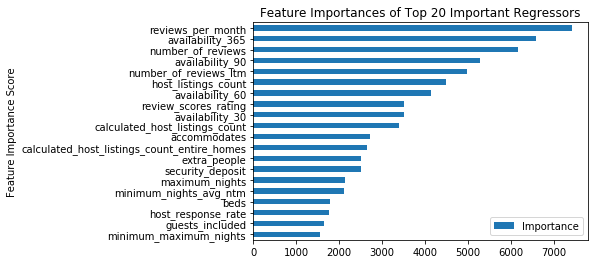

                                        Features  Importance
34                             reviews_per_month        7418
20                              availability_365        6582
21                             number_of_reviews        6156
19                               availability_90        5286
22                         number_of_reviews_ltm        4980
1                            host_listings_count        4486
18                               availability_60        4141
23                          review_scores_rating        3503
17                               availability_30        3502
30                calculated_host_listings_count        3391
2                                   accommodates        2719
31   calculated_host_listings_count_entire_homes        2640
8                                   extra_people        2514
6                               security_deposit        2507
10                                maximum_nights        2127
15                      

In [38]:
feat_imp = model.feature_importance()
feat = X_train.columns.tolist()
res_df = pd.DataFrame({'Features': feat, 'Importance': feat_imp}).sort_values(by='Importance', ascending=False).iloc[:20,:].sort_values(by='Importance', ascending=True)
res_df.plot('Features', 'Importance', kind='barh', title='Feature Importances of Top 20 Important Regressors')
plt.ylabel('Feature Importance Score')
#plt.figure(figsize=(200, 100))
#plt.tight_layout()
plt.show()
print(pd.DataFrame({'Features': feat, 'Importance': feat_imp}).sort_values(by='Importance', ascending=False))
res_df.to_excel('feature_importance.xlsx', sheet_name='sheet1', index=False)

### 4.8 CatBoost Regression with Grid Search(The best model for this project)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df_listings_boston_lgbm, Y, test_size=0.3, random_state=seed)
cat_features_index = [35,36,37,38,39,40,41,42,43,44,45,46,47,48,49]
params = {'depth': [4, 7],

          'learning_rate' : [0.03, 0.1, 0.15],

         'l2_leaf_reg': [1,4,9],
    
         'iterations': [200,300]}

cb = CatBoostRegressor()
gsc = GridSearchCV(cb, 
                        params,     
                        cv=5, 
                        scoring='neg_mean_squared_error', 
                        verbose=1,
                        n_jobs=-1)

grid_result = gsc.fit(X_train, y_train)
best_params = grid_result.best_params_
cb = CatBoostRegressor(depth=best_params["depth"],
                       learning_rate=best_params["learning_rate"],
                       l2_leaf_reg=best_params["l2_leaf_reg"],
                       iterations=best_params["iterations"])
cb.fit(X_train,y_train, cat_features= cat_features_index)
preds_train = cb.predict(X_train)
preds_test = cb.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, preds_train))
rmse_test = np.sqrt(mean_squared_error(y_test, preds_test))
print("RMSE of Training Data: %f" % (rmse_train))
print("RMSE of Testing Data: %f" % (rmse_test))


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  5.3min finished


0:	learn: 132.9372923	total: 142ms	remaining: 42.6s
1:	learn: 122.0944887	total: 148ms	remaining: 22.1s
2:	learn: 113.8647174	total: 167ms	remaining: 16.6s
3:	learn: 106.7480814	total: 173ms	remaining: 12.8s
4:	learn: 100.8534598	total: 179ms	remaining: 10.5s
5:	learn: 95.9138660	total: 185ms	remaining: 9.07s
6:	learn: 92.2941740	total: 190ms	remaining: 7.97s
7:	learn: 89.3477828	total: 196ms	remaining: 7.16s
8:	learn: 86.5775963	total: 202ms	remaining: 6.53s
9:	learn: 84.2217373	total: 208ms	remaining: 6.04s
10:	learn: 82.3819958	total: 214ms	remaining: 5.62s
11:	learn: 80.7037006	total: 220ms	remaining: 5.29s
12:	learn: 79.1958215	total: 226ms	remaining: 5s
13:	learn: 77.7929312	total: 235ms	remaining: 4.8s
14:	learn: 76.5398536	total: 242ms	remaining: 4.59s
15:	learn: 75.4934394	total: 249ms	remaining: 4.42s
16:	learn: 74.4051808	total: 256ms	remaining: 4.27s
17:	learn: 73.5062349	total: 264ms	remaining: 4.13s
18:	learn: 72.9024989	total: 272ms	remaining: 4.02s
19:	learn: 72.0110014

171:	learn: 38.9882881	total: 1.27s	remaining: 949ms
172:	learn: 38.8181298	total: 1.28s	remaining: 941ms
173:	learn: 38.6915641	total: 1.29s	remaining: 932ms
174:	learn: 38.5591238	total: 1.29s	remaining: 923ms
175:	learn: 38.4605674	total: 1.3s	remaining: 915ms
176:	learn: 38.3950592	total: 1.31s	remaining: 913ms
177:	learn: 38.3188826	total: 1.32s	remaining: 905ms
178:	learn: 38.2625232	total: 1.33s	remaining: 897ms
179:	learn: 38.1907419	total: 1.34s	remaining: 897ms
180:	learn: 38.0769590	total: 1.35s	remaining: 888ms
181:	learn: 37.9304680	total: 1.36s	remaining: 880ms
182:	learn: 37.8596935	total: 1.36s	remaining: 871ms
183:	learn: 37.8117775	total: 1.37s	remaining: 862ms
184:	learn: 37.7481862	total: 1.37s	remaining: 853ms
185:	learn: 37.6816066	total: 1.38s	remaining: 845ms
186:	learn: 37.5188922	total: 1.38s	remaining: 837ms
187:	learn: 37.3460984	total: 1.39s	remaining: 828ms
188:	learn: 37.2871320	total: 1.4s	remaining: 820ms
189:	learn: 37.1774701	total: 1.4s	remaining: 81

27:	learn: 66.3406799	total: 1.68s	remaining: 16.3s
28:	learn: 65.9357133	total: 1.73s	remaining: 16.1s
29:	learn: 65.8127183	total: 1.78s	remaining: 16s
30:	learn: 65.6013165	total: 1.83s	remaining: 15.9s
31:	learn: 65.3408296	total: 1.88s	remaining: 15.7s
32:	learn: 64.9727482	total: 1.93s	remaining: 15.6s
33:	learn: 64.4982066	total: 1.96s	remaining: 15.4s
34:	learn: 64.1526874	total: 2.01s	remaining: 15.2s
35:	learn: 63.5192006	total: 2.06s	remaining: 15.1s
36:	learn: 63.3088758	total: 2.1s	remaining: 15s
37:	learn: 63.0970929	total: 2.15s	remaining: 14.8s
38:	learn: 62.7792322	total: 2.21s	remaining: 14.8s
39:	learn: 62.5291150	total: 2.27s	remaining: 14.8s
40:	learn: 62.1318700	total: 2.33s	remaining: 14.7s
41:	learn: 61.7712982	total: 2.37s	remaining: 14.6s
42:	learn: 61.3673562	total: 2.42s	remaining: 14.5s
43:	learn: 61.0750479	total: 2.47s	remaining: 14.4s
44:	learn: 60.8367050	total: 2.52s	remaining: 14.3s
45:	learn: 60.4706603	total: 2.57s	remaining: 14.2s
46:	learn: 60.124

188:	learn: 38.0184035	total: 10.5s	remaining: 6.17s
189:	learn: 37.9646514	total: 10.6s	remaining: 6.12s
190:	learn: 37.9352900	total: 10.6s	remaining: 6.06s
191:	learn: 37.8863128	total: 10.7s	remaining: 6s
192:	learn: 37.8422803	total: 10.7s	remaining: 5.95s
193:	learn: 37.6873708	total: 10.8s	remaining: 5.89s
194:	learn: 37.5790463	total: 10.8s	remaining: 5.83s
195:	learn: 37.4763455	total: 10.9s	remaining: 5.78s
196:	learn: 37.3881321	total: 11s	remaining: 5.74s
197:	learn: 37.3300128	total: 11s	remaining: 5.68s
198:	learn: 37.2651313	total: 11.1s	remaining: 5.63s
199:	learn: 37.1574819	total: 11.1s	remaining: 5.57s
200:	learn: 37.1133762	total: 11.2s	remaining: 5.52s
201:	learn: 37.0718877	total: 11.3s	remaining: 5.48s
202:	learn: 37.0094022	total: 11.3s	remaining: 5.42s
203:	learn: 36.9287866	total: 11.4s	remaining: 5.36s
204:	learn: 36.8796516	total: 11.5s	remaining: 5.31s
205:	learn: 36.7843951	total: 11.5s	remaining: 5.25s
206:	learn: 36.7464646	total: 11.6s	remaining: 5.19s


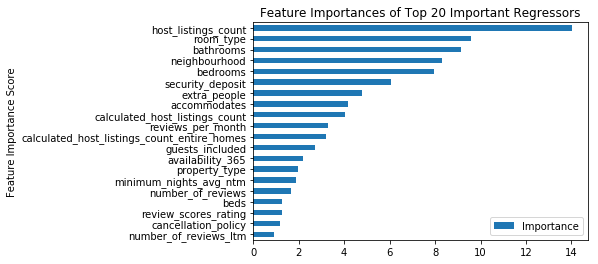

                                        Features  Importance
1                            host_listings_count   14.024699
47                                     room_type    9.575382
3                                      bathrooms    9.119572
45                                 neighbourhood    8.310773
4                                       bedrooms    7.945154
6                               security_deposit    6.041049
8                                   extra_people    4.788242
2                                   accommodates    4.151853
30                calculated_host_listings_count    4.053424
34                             reviews_per_month    3.308572
31   calculated_host_listings_count_entire_homes    3.222434
7                                guests_included    2.723390
20                              availability_365    2.197554
46                                 property_type    1.955736
15                        minimum_nights_avg_ntm    1.880276
21                      

In [39]:
feat_imp = cb.get_feature_importance()
feat = X_train.columns.tolist()
res_df = pd.DataFrame({'Features': feat, 'Importance': feat_imp}).sort_values(by='Importance', ascending=False).iloc[:20,:].sort_values(by='Importance', ascending=True)
res_df.plot('Features', 'Importance', kind='barh', title='Feature Importances of Top 20 Important Regressors')
plt.ylabel('Feature Importance Score')
#plt.figure(figsize=(200, 100))
#plt.tight_layout()
plt.show()
print(pd.DataFrame({'Features': feat, 'Importance': feat_imp}).sort_values(by='Importance', ascending=False))
res_df.to_excel('feature_importance.xlsx', sheet_name='sheet1', index=False)